In [45]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler




### Objective:
Analyze the historical stock performance of 10 companies across 5 sectors and calculate key financial ratios. Provide insights into the companies' performance, risk, and valuation to guide investment decisions.

Taking 2 stocks from 5 key sectors
 - Technology
 - Healthcare
 - Finance
 - Consumer goods
 - Industrials

### 1. Data collection

In [33]:
stocks = ['AAPL', 'MSFT', 'JNJ', 'PFE', 'JPM', 'GS', 'TSLA', 'AMZN', 'DAL', 'HON' ]

start_date = '2018-09-01'
end_date = '2024-09-01'

stock_data = yf.download(stocks, start = start_date, end = end_date)

stock_data.head()

[*********************100%***********************]  10 of 10 completed


Price                      Adj Close                                     \
Ticker                          AAPL        AMZN        DAL          GS   
Date                                                                      
2018-09-04 00:00:00+00:00  54.398647  101.975502  55.862934  206.222473   
2018-09-05 00:00:00+00:00  54.043709   99.740997  54.278503  206.135681   
2018-09-06 00:00:00+00:00  53.145641   97.915497  53.547958  203.497818   
2018-09-07 00:00:00+00:00  52.716862   97.603500  53.946442  202.968475   
2018-09-10 00:00:00+00:00  52.009350   96.950500  54.610577  201.233063   

Price                                                                     \
Ticker                            HON         JNJ        JPM        MSFT   
Date                                                                       
2018-09-04 00:00:00+00:00  135.128784  113.395767  96.553993  105.049080   
2018-09-05 00:00:00+00:00  136.948730  115.210487  96.084427  102.021049   
2018-09-06 00:00:00+00:00  138.827835  116.066971  95.673584  102.256165   
2018-09-07 00:00:00+00:00  137.812073  116.448586  95.858025  101.757759   
2018-09-10 00:00:00+00:00  138.286102  116.355339  95.346550  102.858002   

Price                                            ...     Volume             \
Ticker                           PFE       TSLA  ...       AAPL       AMZN   
Date                                             ...                         
2018-09-04 00:00:00+00:00  30.788761  19.263332  ...  109560400  114422000   
2018-09-05 00:00:00+00:00  31.145994  18.716000  ...  133332000  164412000   
2018-09-06 00:00:00+00:00  31.093891  18.730000  ...  137160000  149774000   
2018-09-07 00:00:00+00:00  31.406477  17.549334  ...  150479200   97852000   
2018-09-10 00:00:00+00:00  31.302277  19.033333  ...  158066000   90896000   

Price                                                                    \
Ticker                         DAL       GS      HON      JNJ       JPM   
Date                                                                      
2018-09-04 00:00:00+00:00  5017400  2083500  2437270  4406800  10174200   
2018-09-05 00:00:00+00:00  9495500  2092000  3343004  6174800  11462400   
2018-09-06 00:00:00+00:00  7618100  2651400  4265119  6562000   9877600   
2018-09-07 00:00:00+00:00  6307600  1952900  2886955  6375200  10955600   
2018-09-10 00:00:00+00:00  3894900  1948100  2426941  4892200   8276900   

Price                                                     
Ticker                         MSFT       PFE       TSLA  
Date                                                      
2018-09-04 00:00:00+00:00  22634600  15274779  125257500  
2018-09-05 00:00:00+00:00  32872400  21819908  115812000  
2018-09-06 00:00:00+00:00  23477600  18356780  112212000  
2018-09-07 00:00:00+00:00  22498600  21221658  337378500  
2018-09-10 00:00:00+00:00  20727900  21482206  214252500  

[5 rows x 60 columns]

### 2. Data processing

In [34]:
stock_data.isna().sum()



Price      Ticker
Adj Close  AAPL      0
           AMZN      0
           DAL       0
           GS        0
           HON       0
           JNJ       0
           JPM       0
           MSFT      0
           PFE       0
           TSLA      0
Close      AAPL      0
           AMZN      0
           DAL       0
           GS        0
           HON       0
           JNJ       0
           JPM       0
           MSFT      0
           PFE       0
           TSLA      0
High       AAPL      0
           AMZN      0
           DAL       0
           GS        0
           HON       0
           JNJ       0
           JPM       0
           MSFT      0
           PFE       0
           TSLA      0
Low        AAPL      0
           AMZN      0
           DAL       0
           GS        0
           HON       0
           JNJ       0
           JPM       0
           MSFT      0
           PFE       0
           TSLA      0
Open       AAPL      0
           AMZN      0
           DAL  

We have no missing data

In [35]:
adj_close = stock_data['Adj Close']

adj_close.head()

Ticker,AAPL,AMZN,DAL,GS,HON,JNJ,JPM,MSFT,PFE,TSLA
Date,,,,,,,,,,
2018-09-04 00:00:00+00:00,54.398647,101.975502,55.862934,206.222473,135.128784,113.395767,96.553993,105.049080,30.788761,19.263332
2018-09-05 00:00:00+00:00,54.043709,99.740997,54.278503,206.135681,136.948730,115.210487,96.084427,102.021049,31.145994,18.716000
2018-09-06 00:00:00+00:00,53.145641,97.915497,53.547958,203.497818,138.827835,116.066971,95.673584,102.256165,31.093891,18.730000
2018-09-07 00:00:00+00:00,52.716862,97.603500,53.946442,202.968475,137.812073,116.448586,95.858025,101.757759,31.406477,17.549334
2018-09-10 00:00:00+00:00,52.009350,96.950500,54.610577,201.233063,138.286102,116.355339,95.346550,102.858002,31.302277,19.033333


In [36]:
daily_returns = adj_close.pct_change()
cumulative_returns = (1 + daily_returns).cumprod()

daily_returns.dropna(inplace=True)
cumulative_returns.dropna(inplace=True)


In [37]:
daily_returns.head()

Ticker,AAPL,AMZN,DAL,GS,HON,JNJ,JPM,MSFT,PFE,TSLA
Date,,,,,,,,,,
2018-09-05 00:00:00+00:00,-0.006525,-0.021912,-0.028363,-0.000421,0.013468,0.016003,-0.004863,-0.028825,0.011603,-0.028413
2018-09-06 00:00:00+00:00,-0.016617,-0.018302,-0.013459,-0.012797,0.013721,0.007434,-0.004276,0.002305,-0.001673,0.000748
2018-09-07 00:00:00+00:00,-0.008068,-0.003186,0.007442,-0.002601,-0.007317,0.003288,0.001928,-0.004874,0.010053,-0.063036
2018-09-10 00:00:00+00:00,-0.013421,-0.006690,0.012311,-0.008550,0.003440,-0.000801,-0.005336,0.010812,-0.003318,0.084562
2018-09-11 00:00:00+00:00,0.025283,0.024827,0.012335,-0.007330,-0.001897,0.009474,0.006332,0.017005,0.005944,-0.021226


In [38]:
cumulative_returns.head()

Ticker,AAPL,AMZN,DAL,GS,HON,JNJ,JPM,MSFT,PFE,TSLA
Date,,,,,,,,,,
2018-09-05 00:00:00+00:00,0.993475,0.978088,0.971637,0.999579,1.013468,1.016003,0.995137,0.971175,1.011603,0.971587
2018-09-06 00:00:00+00:00,0.976966,0.960186,0.958560,0.986788,1.027374,1.023556,0.990882,0.973413,1.009910,0.972314
2018-09-07 00:00:00+00:00,0.969084,0.957127,0.965693,0.984221,1.019857,1.026922,0.992792,0.968669,1.020063,0.911023
2018-09-10 00:00:00+00:00,0.956078,0.950723,0.977582,0.975806,1.023365,1.026099,0.987495,0.979142,1.016679,0.988060
2018-09-11 00:00:00+00:00,0.980250,0.974327,0.989640,0.968653,1.021424,1.035821,0.993747,0.995793,1.022722,0.967088


### 3. Financial Ratios

1. **Price-to-Earnings (P/E) Ratio** 

- The P/E ratio measures a company's current share price relative to its per-share earnings. A higher P/E ratio can indicate high growth expectations, while a lower P/E might suggest undervaluation.




2. **Price-to-Book (P/B) Ratio** 

- The P/B ratio compares a company’s market value to its book value. A high P/B ratio could mean overvaluation, while a low P/B might suggest undervaluation



3. **Debt-to-Equity (D/E) Ratio** 

- The D/E ratio measures a company’s financial leverage by comparing its total liabilities to shareholders' equity. A higher ratio indicates more leverage and risk.



4. **Return on Equity (ROE)** 

- ROE measures a company’s profitability by comparing net income to shareholders' equity. A higher ROE indicates more efficient use of equity.


5. **EPS Growth** 

- EPS Growth measures the change in earnings per share over time. Positive growth indicates increasing profitability.



In [41]:
def get_financial_ratios(stocks):
    ratios = pd.DataFrame(index=stocks, columns=['P/E', 'P/B', 'D/E', 'ROE', 'EPS Growth'])
    for stock in stocks:
        ticker = yf.Ticker(stock)
        info = ticker.info
        ratios.loc[stock, 'P/E'] = info.get('trailingPE', np.nan)
        ratios.loc[stock, 'P/B'] = info.get('priceToBook', np.nan)
        ratios.loc[stock, 'D/E'] = info.get('debtToEquity', np.nan)
        ratios.loc[stock, 'ROE'] = info.get('returnOnEquity', np.nan)
        ratios.loc[stock, 'EPS Growth'] = info.get('earningsGrowth', np.nan)
    return ratios

financial_ratios = get_financial_ratios(stocks)
financial_ratios

,P/E,P/B,D/E,ROE,EPS Growth
AAPL,33.35671,49.936104,151.862,1.60583,0.111
MSFT,34.994926,11.443724,36.447,0.37133,0.097
JNJ,25.304083,5.627292,57.999,0.22146,-0.016
PFE,NaN,1.911773,79.407,-0.02737,-0.982
JPM,11.41662,1.839256,NaN,0.16545,0.288
GS,15.059673,1.466998,585.382,0.0949,1.793
TSLA,62.498592,10.661701,18.606,0.20861,-0.462
AMZN,42.32458,7.86779,66.756,0.21933,0.938
DAL,6.202296,2.238157,209.196,0.43806,-0.292
HON,22.760546,7.651997,165.725,0.3274,0.063


#### Initial insights

**Apple Inc. (AAPL) and Microsoft Corp. (MSFT)** are strong tech stocks with high growth potential, reflected in their high P/E ratios of 33.36 and 34.99. Apple’s high ROE of 1.61 suggests robust profitability but its high D/E ratio indicates significant leverage. Microsoft, with a more conservative D/E ratio of 36.45, shows stable profitability but a lower ROE of 0.37.

**Johnson & Johnson (JNJ) and Pfizer Inc. (PFE)** offer stability in healthcare. JNJ’s moderate P/E of 25.30 and strong ROE of 0.22 signal steady performance, though its negative EPS growth raises concerns. Pfizer’s low P/B ratio suggests undervaluation, but its negative EPS growth and ROE are worrying.

**JPMorgan Chase (JPM) and Goldman Sachs (GS)** present mixed profiles in finance. JPMorgan’s low P/E ratio and stable ROE suggest it might be undervalued. In contrast, Goldman Sachs has a high P/E ratio and very high D/E, indicating substantial leverage and risk, but strong EPS growt

**Tesla Inc. (TSLA) and Amazon.com Inc. (AMZN)** show high growth potential. Tesla’s high P/E and P/B ratios indicate strong growth expectations, though its negative EPS growth is a concern. Amazon’s strong EPS growth and substantial P/E ratio reflect positive market outlook, with a manageable D/E ratio.

**Delta Air Lines (DAL) and Honeywell International Inc. (HON)** present varied investment cases. Delta’s low P/E suggests undervaluation, but its high D/E and negative EPS growth highlight risks. Honeywell’s moderate P/E and strong ROE show stability, but its high D/E ratio could pose risks.

### **4. EDA**

We will standardize the stock prices to get a better view of the trends

In [48]:
scaler = StandardScaler()
stan_adj_close = pd.DataFrame(scaler.fit_transform(adj_close),
                                       index=adj_close.index,
                                       columns=adj_close.columns)


stan_adj_close.head()

Ticker,AAPL,AMZN,DAL,GS,HON,JNJ,JPM,MSFT,PFE,TSLA
Date,,,,,,,,,,
2018-09-04 00:00:00+00:00,-1.355941,-0.841165,1.533257,-0.835585,-1.468274,-1.651809,-0.894918,-1.462677,-0.512222,-1.386767
2018-09-05 00:00:00+00:00,-1.362734,-0.906108,1.361041,-0.836559,-1.402479,-1.548253,-0.909257,-1.494497,-0.458429,-1.391959
2018-09-06 00:00:00+00:00,-1.379922,-0.959163,1.281636,-0.866171,-1.334546,-1.499379,-0.921802,-1.492026,-0.466275,-1.391826
2018-09-07 00:00:00+00:00,-1.388129,-0.968230,1.324948,-0.872113,-1.371267,-1.477603,-0.916170,-1.497264,-0.419205,-1.403025
2018-09-10 00:00:00+00:00,-1.401670,-0.987209,1.397135,-0.891594,-1.354130,-1.482924,-0.931789,-1.485702,-0.434896,-1.388949


In [50]:
print("Means:\n", stan_adj_close.mean())
print("Standard Deviations:\n", stan_adj_close.std())

Means:
 Ticker
AAPL    7.538915e-17
AMZN   -1.884729e-16
DAL    -3.769457e-16
GS      1.507783e-16
HON    -1.507783e-16
JNJ     7.538915e-17
JPM    -1.507783e-16
MSFT   -7.538915e-17
PFE    -1.884729e-16
TSLA    1.507783e-16
dtype: float64
Standard Deviations:
 Ticker
AAPL    1.000332
AMZN    1.000332
DAL     1.000332
GS      1.000332
HON     1.000332
JNJ     1.000332
JPM     1.000332
MSFT    1.000332
PFE     1.000332
TSLA    1.000332
dtype: float64


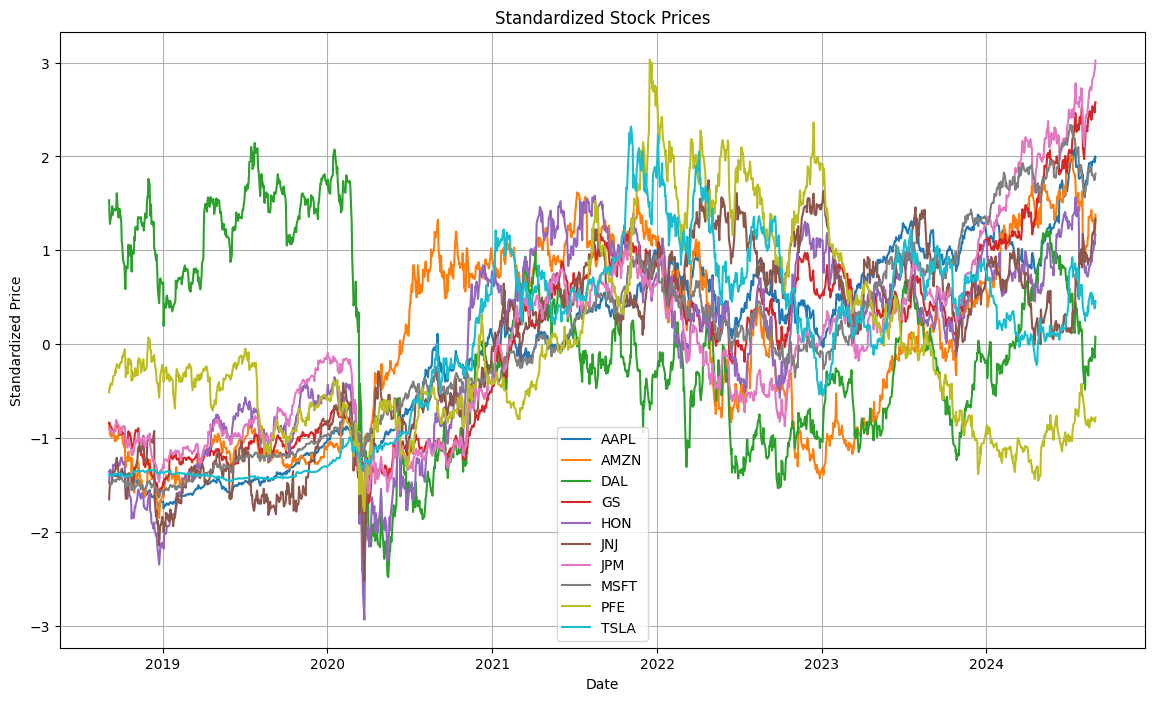

In [51]:
# Plot standardized adjusted close prices
plt.figure(figsize=(14, 8))

for stock in stan_adj_close.columns:
    plt.plot(stan_adj_close.index, stan_adj_close[stock], label=stock)

plt.title('Standardized Stock Prices')
plt.xlabel('Date')
plt.ylabel('Standardized Price')
plt.legend(loc='best')
plt.grid(True)
plt.show()


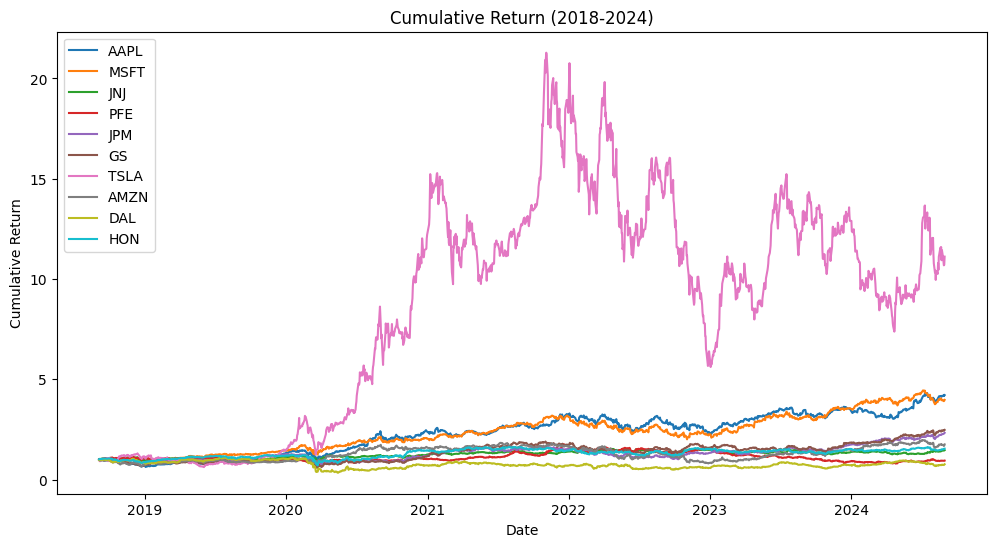

In [44]:
# Plot Cumulative Returns
plt.figure(figsize=(12, 6))
for stock in stocks:
    plt.plot(cumulative_returns.index, cumulative_returns[stock], label=stock)
plt.title('Cumulative Return (2018-2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

#### Moving Averages

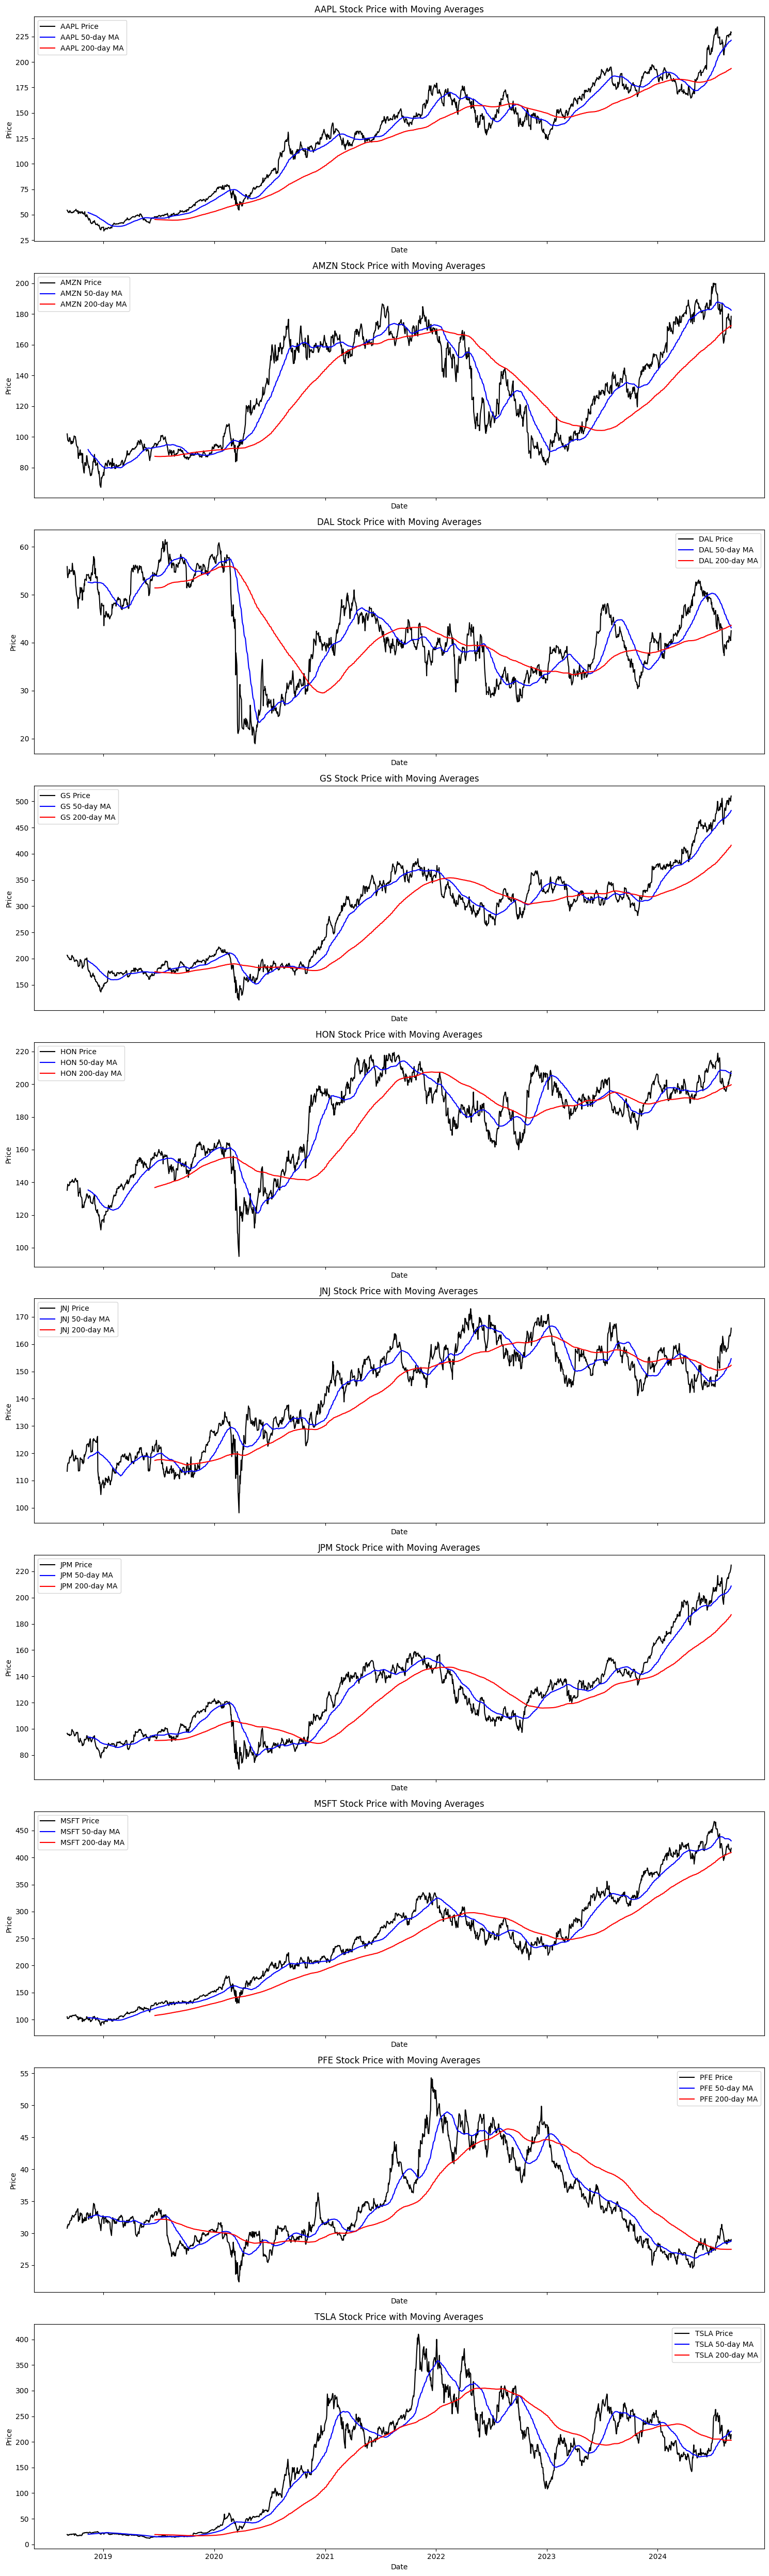

In [55]:
def calculate_moving_averages(df, windows=[50, 200]):
    ma_data = pd.DataFrame(index=df.index)
    for window in windows:
        for ticker in df['Adj Close'].columns:
            ma_data[f'{ticker}_MA{window}'] = df['Adj Close'][ticker].rolling(window=window).mean()
    return ma_data

# Calculate moving averages
ma_data = calculate_moving_averages(stock_data)

# Define the number of stocks and create subplots
num_stocks = len(stock_data['Adj Close'].columns)
fig, axes = plt.subplots(nrows=num_stocks, ncols=1, figsize=(15, 5 * num_stocks), sharex=True)


# Plot data
for i, ticker in enumerate(stock_data['Adj Close'].columns):
    ax = axes[i]
    ax.plot(stock_data.index, stock_data['Adj Close'][ticker], color = 'black', label=f'{ticker} Price')
    ax.plot(ma_data.index, ma_data[f'{ticker}_MA50'], label=f'{ticker} 50-day MA', linestyle='-', color = 'blue')
    ax.plot(ma_data.index, ma_data[f'{ticker}_MA200'], label=f'{ticker} 200-day MA', linestyle='-', color = 'red')
    ax.set_title(f'{ticker} Stock Price with Moving Averages')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()

plt.tight_layout()
plt.show()

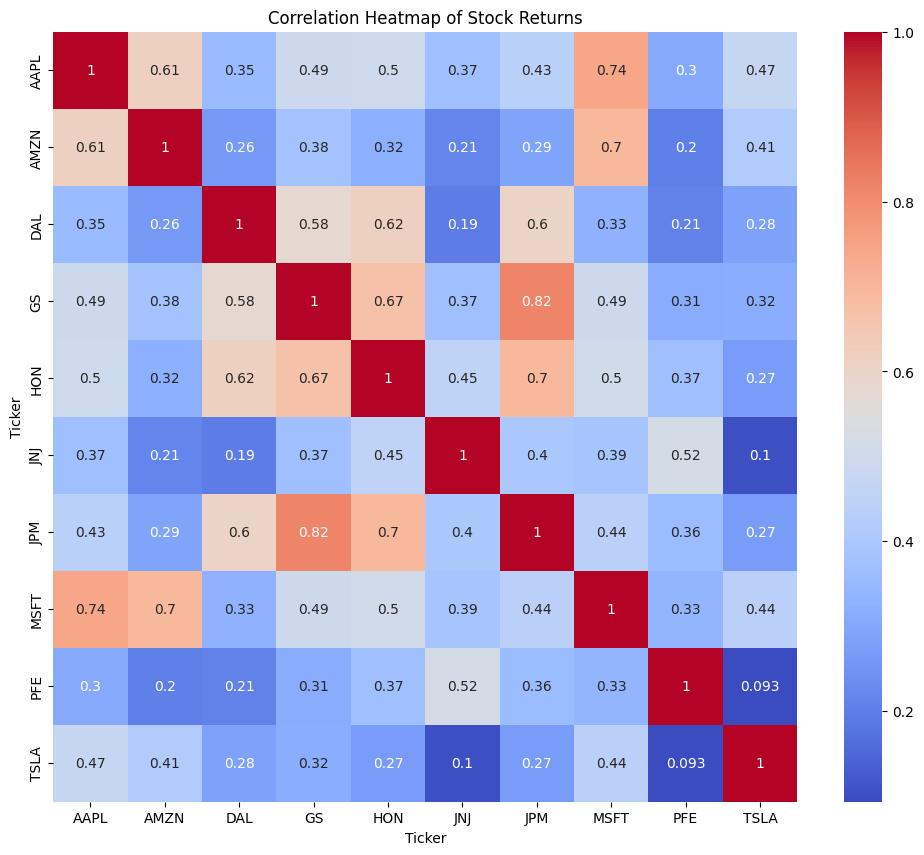

In [68]:
correlation_matrix = adj_close.pct_change().corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Stock Returns')
plt.show()

### **5. Risk assessment**

Find annualised volatility for each stock

In [56]:
volatility = daily_returns.std() * np.sqrt(252)
print("Annualised Volatility")
print(volatility)

Annualised Volatility
Ticker
AAPL    0.317758
AMZN    0.354795
DAL     0.455136
GS      0.316769
HON     0.258063
JNJ     0.198183
JPM     0.303579
MSFT    0.297460
PFE     0.262012
TSLA    0.643344
dtype: float64


#### **Beta and sharpe ratios**

Beta: Measures the stock's volatility relative to the market. A beta greater than 1 indicates that the stock is more volatile than the market, while a beta less than 1 indicates less volatility.


Sharpe Ratio: Measures the risk-adjusted return. A higher Sharpe Ratio indicates better risk-adjusted performance. Negative values suggest that the returns are less than the risk-free rate, meaning the investment may not be performing well relative to its risk.

In [61]:
def calculate_beta(stock_returns, market_returns):
    covariance = stock_returns.cov(market_returns)
    market_variance = market_returns.var()
    return covariance / market_variance

def calculate_sharpe_ratio(returns, risk_free_rate = 0.037):  # Current rate of 10 year Treasury Rate
    excess_returns = returns - risk_free_rate / 252
    return np.sqrt(252) * excess_returns.mean() / excess_returns.std()

# Get market data
sp500 = yf.download('^GSPC', start = start_date, end = end_date)
sp500_returns = sp500['Adj Close'].pct_change().dropna()

sp500_returns.index = sp500_returns.index.tz_localize(None)

risk_metrics = pd.DataFrame(index = stocks, columns = ['Beta', 'Sharpe Ratio'])

for stock in stocks:
    stock_returns = daily_returns[stock].dropna()
    stock_returns.index = stock_returns.index.tz_localize(None)
    risk_metrics.loc[stock, 'Beta'] = calculate_beta(stock_returns, sp500_returns)
    risk_metrics.loc[stock, 'Sharpe Ratio'] = calculate_sharpe_ratio(stock_returns)
    risk_metrics.loc[stock, 'Annualized Volatility'] = stock_returns.std() * np.sqrt(252)

risk_metrics



[*********************100%***********************]  1 of 1 completed


,Beta,Sharpe Ratio,Annualized Volatility
AAPL,1.222401,0.799211,0.317758
MSFT,1.198368,0.799902,0.297460
JNJ,0.504701,0.23341,0.198183
PFE,0.570414,-0.048572,0.262012
JPM,1.06364,0.495124,0.303579
GS,1.136924,0.519749,0.316769
TSLA,1.517683,0.889902,0.643344
AMZN,1.142806,0.336861,0.354795
DAL,1.256848,0.047701,0.455136
HON,0.945769,0.264842,0.258063


**High Beta Stocks:**
- TSLA (1.52) and AAPL (1.22) are the most volatile compared to the market. This suggests they have higher risk but potentially higher returns.
- DAL (1.26) and GS (1.14) also show higher volatility compared to the market.

**Low Beta Stocks:**
- JNJ (0.50) and HON (0.95) are less volatile compared to the market, indicating they might be more stable investments.

**Sharpe Ratio:**
- TSLA (0.89) and MSFT (0.80) have the highest Sharpe Ratios, suggesting that they provide better risk-adjusted returns.
- PFE (-0.05) and JNJ (0.23) have lower Sharpe Ratios, indicating weaker performance relative to their risk.

### **Reccomendations**

In [63]:
def get_recommendation(row):
    score = 0
    if row['P/E'] < 20: score += 1
    if row['P/B'] < 3: score += 1
    if row['D/E'] < 1: score += 1
    if row['ROE'] > 0.15: score += 1
    if row['EPS Growth'] > 0.1: score += 1
    if 0.8 < row['Beta'] < 1.2: score += 1
    if row['Sharpe Ratio'] > 1: score += 1
    
    if score >= 5:
        return 'Buy'
    elif score >= 3:
        return 'Hold'
    else:
        return 'Sell'
    
    
    
recommendations = pd.concat([financial_ratios, risk_metrics], axis=1)
recommendations['Recommendation'] = recommendations.apply(get_recommendation, axis=1)

recommendations

,P/E,P/B,D/E,ROE,EPS Growth,Beta,Sharpe Ratio,Annualized Volatility,Recommendation
AAPL,33.35671,49.936104,151.862,1.60583,0.111,1.222401,0.799211,0.317758,Sell
MSFT,34.994926,11.443724,36.447,0.37133,0.097,1.198368,0.799902,0.297460,Sell
JNJ,25.304083,5.627292,57.999,0.22146,-0.016,0.504701,0.23341,0.198183,Sell
PFE,NaN,1.911773,79.407,-0.02737,-0.982,0.570414,-0.048572,0.262012,Sell
JPM,11.41662,1.839256,NaN,0.16545,0.288,1.06364,0.495124,0.303579,Buy
GS,15.059673,1.466998,585.382,0.0949,1.793,1.136924,0.519749,0.316769,Hold
TSLA,62.498592,10.661701,18.606,0.20861,-0.462,1.517683,0.889902,0.643344,Sell
AMZN,42.32458,7.86779,66.756,0.21933,0.938,1.142806,0.336861,0.354795,Hold
DAL,6.202296,2.238157,209.196,0.43806,-0.292,1.256848,0.047701,0.455136,Hold
HON,22.760546,7.651997,165.725,0.3274,0.063,0.945769,0.264842,0.258063,Sell


## **6. Insights**



##### **Valuation Metrics (P/E and P/B Ratios):**

- AAPL, MSFT, and TSLA have high P/E ratios, significantly above the threshold of 20. This indicates that these stocks are potentially overvalued compared to their earnings. For instance, TSLA’s P/E ratio of 62.50 is notably high.
- JNJ and DAL have relatively lower P/E ratios, suggesting they might be undervalued or priced lower relative to their earnings. DAL’s P/E of 6.20 is exceptionally low.
- P/B Ratios also vary, with AAPL having a very high P/B ratio of 49.94, suggesting overvaluation compared to its book value. In contrast, PFE has a very low P/B ratio of 1.91, which might suggest it’s undervalued or has a high book value relative to its market price.

Debt and Financial Stability (D/E Ratio):


##### **Debt and Financial Stability (D/E Ratio):**

- AAPL and TSLA have very high D/E ratios, especially AAPL with a ratio of 151.86. High D/E ratios may indicate high leverage and financial risk.
- DAL has a very high D/E ratio of 209.20, indicating significant debt relative to equity. This high leverage can be risky, especially in volatile markets.
- PFE has a relatively high D/E ratio of 79.41, which also suggests substantial debt.



##### **Profitability Metrics (ROE and EPS Growth):**

- AAPL, AMZN, and DAL have strong ROE values (1.60583, 0.21933, and 0.43806 respectively), indicating robust profitability and effective management of equity.
- JNJ and TSLA have moderate ROE, while PFE and GS have negative or low ROE values, indicating weaker profitability or challenges in generating returns on equity.
- EPS Growth is positive for AAPL, AMZN, and DAL, suggesting these companies are growing their earnings. However, PFE and TSLA have negative EPS growth, which can be concerning.


##### **Risk Metrics (Beta, Sharpe Ratio, and Volatility):**

- TSLA has the highest Beta (1.517683) and Annualized Volatility (0.643344), indicating high risk and volatility. It’s more sensitive to market movements.
- JNJ has the lowest Beta (0.504701) and Volatility (0.198183), suggesting lower risk and stability relative to the market.
- The Sharpe Ratio for TSLA is the highest (0.889902), indicating it has offered better risk-adjusted returns compared to others despite its high volatility.



##### **Recommendations**
- Buy recommendation is given to JPM, which has a balanced financial profile with lower P/E, moderate debt, positive ROE, and acceptable Beta and Sharpe Ratio.

- Hold recommendations are given to GS, AMZN, and DAL. These companies have mixed profiles: they may have some attractive metrics but also have areas that need caution, such as high P/E ratios or high volatility.

- Sell recommendations are given to AAPL, MSFT, JNJ, PFE, TSLA, and HON. These stocks generally have high P/E ratios, high debt, or low profitability, coupled with varying degrees of risk and volatility.

This analysis offers a strategic perspective on equity investment opportunities, emphasising the importance of balancing valuation, risk, and profitability in decision-making